# Import Libraries, Loading & Preparing data

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Load themnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,"x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [9]:
np.random.seed(0)

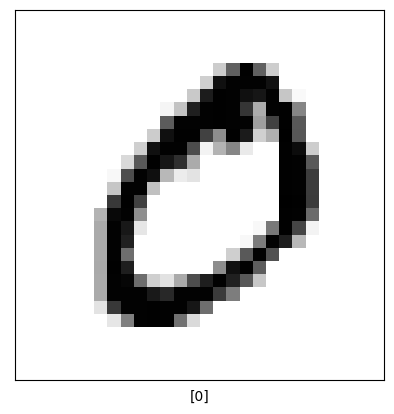

In [10]:
# Show one of the images from the training dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[1]])
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [11]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


# Define the CNN Model

In [12]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()


C:\Users\HARSHAL\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [14]:
x_train = x_train.reshape(-1,28, 28,1)#Reshape for CNN
x_test = x_test.reshape(-1,28, 28, 1)


# Train the Model

In [15]:
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)


Epoch 1/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.7667 - loss: 0.7041 - val_accuracy: 0.9676 - val_loss: 0.1060
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9497 - loss: 0.1604 - val_accuracy: 0.9781 - val_loss: 0.0729
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.9638 - loss: 0.1180 - val_accuracy: 0.9816 - val_loss: 0.0600
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9698 - loss: 0.0961 - val_accuracy: 0.9836 - val_loss: 0.0543
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9732 - loss: 0.0846 - val_accuracy: 0.9847 - val_loss: 0.0494
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9770 - loss: 0.0709 - val_accuracy: 0.9866 - val_loss: 0.0447
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9795 - loss: 0.0657 - val_accuracy: 0.9874 - val_loss: 0.0427
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9802 - loss: 0.0589 - 

# Model Evaluation

In [16]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9894000291824341


# Make Predictions

In [17]:
predictions = model.predict(x_test)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([2.5597191e-09, 6.6995369e-09, 8.3813410e-07, 1.2868681e-07,
       9.0149919e-12, 3.3482814e-11, 9.5526523e-16, 9.9999869e-01,
       4.7219468e-09, 3.1911378e-07], dtype=float32)

In [18]:
np.argmax(predictions[0])

7

In [19]:
x_test = x_test.reshape(-1,28, 28)
x_test.shape

(10000, 28, 28)

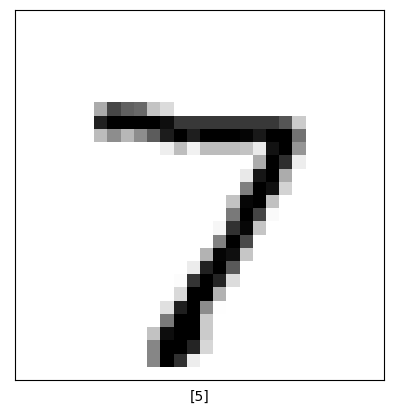

In [20]:
# Show one of the images from the test dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)


# Plot metrics

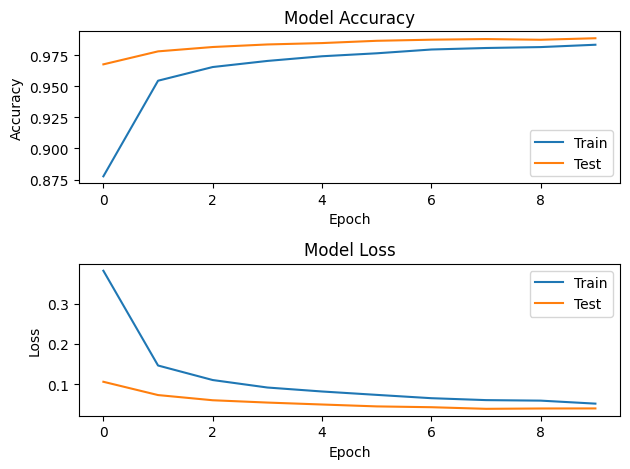

In [21]:
import os
import matplotlib.pyplot as plt

# Plotting the metrics like accuracy and loss
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.tight_layout()
plt.show()

# Save the model in .h5 format (recommended for TensorFlow models)
model.save("mnist_model.h5")


In [22]:
#Define function to plot image with prediction
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

#Define function to plot value array
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

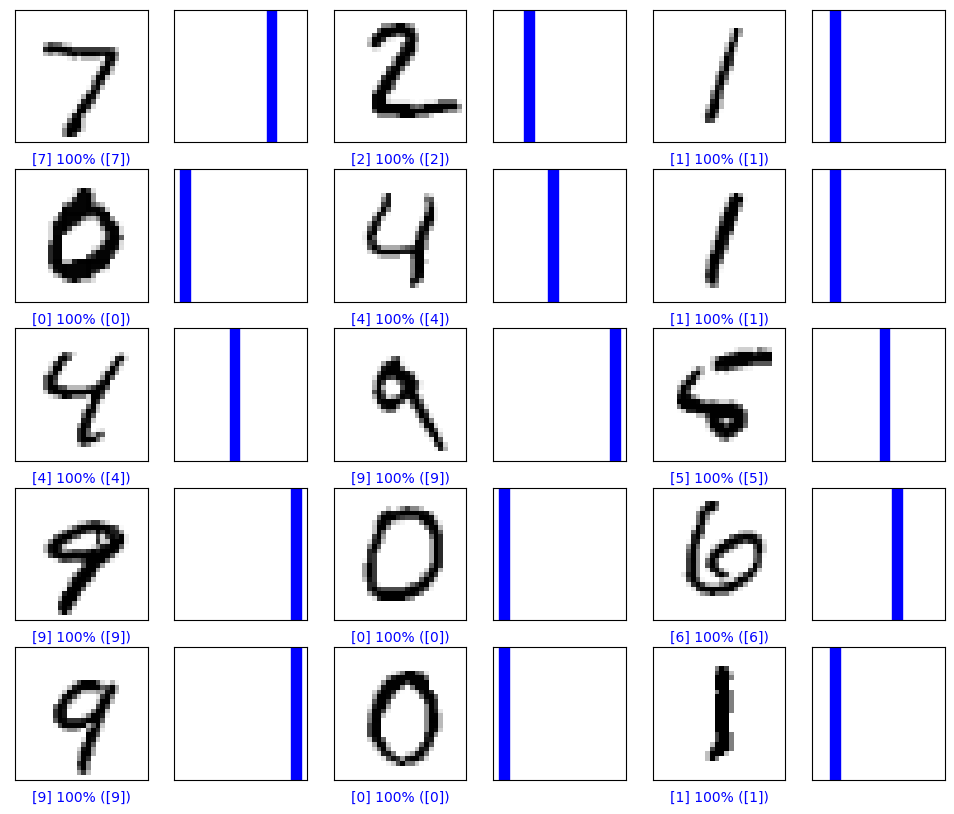

In [23]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

## Importing necessary libraries

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [25]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)
datagen.fit(x_train)


## Further Model Compilation and Training

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Experiment with learning rates
              metrics=['accuracy'])

# Train the model using augmented data
model_log = model.fit(datagen.flow(x_train, y_train, batch_size=60), 
                      epochs=10, 
                      validation_data=(x_test, y_test), 
                      callbacks=[early_stopping])


Epoch 1/10


C:\Users\HARSHAL\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 68s 65ms/step - accuracy: 0.9044 - loss: 0.3166 - val_accuracy: 0.9905 - val_loss: 0.0281
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 59s 58ms/step - accuracy: 0.9472 - loss: 0.1726 - val_accuracy: 0.9902 - val_loss: 0.0268
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.9546 - loss: 0.1476 - val_accuracy: 0.9913 - val_loss: 0.0238
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 53s 53ms/step - accuracy: 0.9587 - loss: 0.1336 - val_accuracy: 0.9909 - val_loss: 0.0269
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.9617 - loss: 0.1217 - val_accuracy: 0.9916 - val_loss: 0.0242
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.9640 - loss: 0.1196 - val_accuracy: 0.9926 - val_loss: 0.0214
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 53s 52ms/step - accuracy: 0.9652 - loss: 0.1140 - val_accuracy: 0.9916 - val_loss: 0.0223
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 53s 53ms/step - accuracy: 0.9660 - loss: 0.10

## Evaluating Model with a Confusion Matrix

In [27]:
# Predict and create confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


## Visualizing the Confusion Matrix

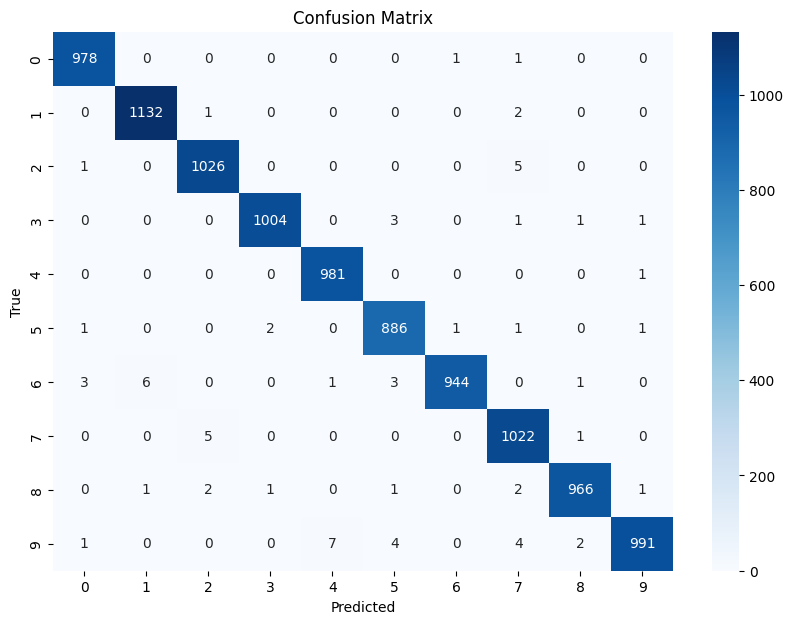

In [28]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Saving the Enhanced Model

In [29]:
model.save('mnist_model_enhanced.h5')
